In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [2]:
# FEATURES_FRIENDS = pd.read_csv('/home/docker_current/datasets/VK/FINAL_FEATURES_FRIENDS.tsv', sep = '\t')

In [3]:
SEQUENCES_TRAINTEST = pd.read_csv('data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv', sep = '\t')
SEQUENCES_MATRIX = pd.read_csv('data/FINAL_SEQUENCES_MATRIX.tsv', sep = '\t')

FEATURES_TRAINTEST = pd.read_csv('data/FINAL_FEATURES_TRAINTEST.tsv', sep = '\t')
TARGETS_DATES_TRAINTEST = pd.read_csv('data/FINAL_TARGETS_DATES_TRAINTEST.tsv', sep = '\t')

In [4]:
SEQUENCES_MATRIX.head()

,SESSIONS_SEQUENCES
0,"['68a9902529901882ecd5143460468d4c', '79d75347..."
1,['72b88f72bca2636844bb14b9cd9e29b3']
2,"['b496d19eb25556bd64e481d11b6f7dd6', 'd21918bb..."
3,"['dcb3d50673073d3c023db102f21b2d3e', '09a5d816..."
4,"['3de59e26ee7e94a6ccd0a2eead2fab9a', '4a51f13a..."


In [5]:
SEQUENCES_MATRIX.shape

(1489576, 1)

In [6]:
SEQUENCES_TRAINTEST.shape

(123707, 2)

In [7]:
FEATURES_TRAINTEST.head()

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
0,7150,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7154,0.0,16.0,156.0,0.0,0.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7156,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26966,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26993,0.0,27.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
TARGETS_DATES_TRAINTEST.head()

,CLIENT_ID,RETRO_DT,TARGET
0,1011725,20210501,0
1,1018784,20210501,1
2,1021812,20210501,0
3,1024003,20210501,0
4,1025140,20210501,test


In [9]:
len(FEATURES_TRAINTEST), len(TARGETS_DATES_TRAINTEST)

(159288, 159290)

In [10]:
data = TARGETS_DATES_TRAINTEST.merge(FEATURES_TRAINTEST, how='inner')
del TARGETS_DATES_TRAINTEST, FEATURES_TRAINTEST

In [11]:
data.shape

(159288, 1017)

In [12]:
data = data.merge(SEQUENCES_TRAINTEST, how='left')
data.SEQUENCE = data.SEQUENCE.fillna('')

In [13]:
data.shape

(159288, 1018)

In [14]:
selected_feat =  ['i4500', 'i1748', 'i4292', 'i831', 'i1667', 'i715', 'u1=187',
   'u2=76', 'u2=75', 'u2=19', 'i883', 'i4488', 'i1411', 'i890',
   'u7=1.5', 'i588', 'i1457', 'i3534', 'u1=160', 'i1681', 'i1460',
   'i1598', 'u2=15', 'u2=66', 'i1092', 'u2=54', 'i720', 'i3350',
   'u0=22', 'i714', 'i1465', 'i859', 'i1746', 'u7=1', 'u0=124',
   'u1=108', 'i768', 'i3358', 'i688', 'i1462', 'i1147', 'u8=0.1',
   'u4=3', 'u0=26', 'i591', 'i3268', 'i876', 'i1466', 'u2=4', 'u7=2',
   'u2=83', 'i717', 'i3284', 'i860', 'i1431', 'i1361', 'u2=14',
   'i1130', 'u1=374', 'i465', 'i676', 'i490', 'u5=2', 'u2=6', 'i491',
   'u6=2', 'i1070', 'i574', 'u0=127', 'i520', 'i4492', 'i647', 'i597',
   'i453', 'i4294', 'u5=6', 'i825', 'i606', 'u0=23', 'u2=40', 'i1360',
   'i845', 'u7=1.33', 'u2=31', 'i726', 'i670', 'i1669', 'i593',
   'i2510', 'i821', 'u2=0', 'i1438', 'i4296', 'i650', 'u2=36',
   'u2=38', 'u3=7', 'u7=2.25', 'u7=3', 'i2626']

In [15]:
trainval_data = data[data['TARGET'] != 'test']
trainval_target = trainval_data['TARGET']
trainval_feat = trainval_data.drop(['RETRO_DT', 'TARGET', 'CLIENT_ID'], axis=1)

selective = True

if selective:
    trainval_feat = trainval_feat[selected_feat + ['SEQUENCE']]

trainval_feat.head()

,i4500,i1748,i4292,i831,i1667,i715,u1=187,u2=76,u2=75,u2=19,...,i1438,i4296,i650,u2=36,u2=38,u3=7,u7=2.25,u7=3,i2626,SEQUENCE
0,245.0,76.0,33.0,15.0,49.0,2.0,430.0,0.0,0.0,0.0,...,3.0,3.0,0.0,1248.0,0.0,241.0,0.0,0.0,0.0,"['358f1de5feb4209fae852fb0a61de5d8', '6760174c..."
1,658.0,14.0,96.0,36.0,1358.0,63.0,0.0,0.0,0.0,0.0,...,3.0,39.0,0.0,0.0,0.0,800.0,0.0,0.0,0.0,"['9a7670be67a118ddd4b30f5cdd3b035e', 'e5945238..."
2,12.0,66.0,12.0,102.0,35.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,2151.0,0.0,33.0,18.0,"['e65bd9b13ec4a97ac7b912f37c3e36d4', '9a7670be..."
3,704.0,565.0,96.0,30.0,81.0,4.0,68.0,0.0,1695.0,7179.0,...,28.0,45.0,2.0,0.0,0.0,327.0,0.0,0.0,6.0,"['489fed35d8b91d95691efab0215e46a8', '9b4b7f50..."
5,956.0,848.0,116.0,73.0,202.0,0.0,2692.0,0.0,25.0,2587.0,...,3.0,0.0,0.0,2.0,0.0,202.0,52.0,0.0,0.0,"['833f134928f303b5531209ff372ab4ce', 'b496d19e..."


In [16]:
X_train, X_val, y_train, y_val = train_test_split(trainval_feat, trainval_target, 
                                                    test_size=0.15, random_state=42, stratify=trainval_target)

In [17]:
trainval_feat = None
trainval_data = None
FEATURES_TRAINTEST = None
TARGETS_DATES_TRAINTEST = None

In [18]:
X_train.SEQUENCE

54093                                                    []
27930     ['ca431c645b8bbf6de0a2ce1f9856af50', '9a7670be...
22221                                                    []
16207     ['9d3087e7e08df9267ad8676fd02b19f7', 'fa5c2545...
156994    ['b496d19eb25556bd64e481d11b6f7dd6', '9a7670be...
                                ...                        
111847                                                     
12416     ['c5395c7dcc1ba883953e199a1ee469c3', '931dd59f...
53663                                                      
98951                                                      
124283                                                     
Name: SEQUENCE, Length: 108315, dtype: object

In [19]:
SEQUENCES_MATRIX = SEQUENCES_MATRIX.SESSIONS_SEQUENCES.append(X_train.SEQUENCE)
SEQUENCES_MATRIX.shape

C:\Users\pqlet\AppData\Local\Temp\ipykernel_18708\2151661546.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SEQUENCES_MATRIX = SEQUENCES_MATRIX.SESSIONS_SEQUENCES.append(X_train.SEQUENCE)


(1597891,)

In [20]:
tfvec = TfidfVectorizer(
#     min_df=5
#     ngram_range=(1,2)
)
SEQUENCES_MATRIX = tfvec.fit_transform(SEQUENCES_MATRIX)

In [97]:
tsvd = TruncatedSVD(n_components=300)
SEQUENCES_MATRIX = tsvd.fit_transform(SEQUENCES_MATRIX)

X_train = np.hstack([X_train, SEQUENCES_MATRIX[-X_train.shape[0]:]])

X_train = np.hstack([X_train[:, :100], X_train[:, 101:]])
X_train.shape

In [ ]:
val_seq = tfvec.transform(X_val.SEQUENCE)
val_seq = tsvd.transform(val_seq)
print(val_seq.shape)

X_val = np.hstack([X_val.drop(columns='SEQUENCE'), val_seq])
print(X_val.shape)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=6000,
    learning_rate=0.01,
    silent=False,
    random_seed=42,
    task_type='GPU',
    eval_metric='AUC',
#     max_ctr_complexity = 7,
    max_depth=6,

    
    #         metric_period=50,
)

model.fit(X_train,
          y_train,
          eval_set=[(
              X_val,
              y_val)],
          verbose=True,
         plot=True
)

In [29]:
from sklearn.metrics import roc_auc_score

preds_class = model.predict_proba(X_val)

roc_auc_score(y_val.values, preds_class[:, 1]), roc_auc_score(y_train.values, model.predict_proba(X_train)[:, 1])

(0.6162294130424014, 0.7552636415245333)

In [23]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.01,
    silent=False,
    random_seed=42,
    task_type='GPU',
    eval_metric='AUC',
#     max_ctr_complexity = 7,
    max_depth=10,
    
    #         metric_period=50,
)

model.fit(X_train,
          y_train,
          eval_set=[(
              X_val,
              y_val)],
          verbose=True,
         plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5527243	best: 0.5527243 (0)	total: 97.7ms	remaining: 4m 52s
1:	total: 185ms	remaining: 4m 37s
2:	total: 269ms	remaining: 4m 29s
3:	total: 345ms	remaining: 4m 18s
4:	total: 422ms	remaining: 4m 12s
5:	test: 0.5803442	best: 0.5803442 (5)	total: 501ms	remaining: 4m 10s
6:	total: 578ms	remaining: 4m 7s
7:	total: 653ms	remaining: 4m 4s
8:	total: 730ms	remaining: 4m 2s
9:	total: 806ms	remaining: 4m 1s
10:	test: 0.5846767	best: 0.5846767 (10)	total: 886ms	remaining: 4m
11:	total: 963ms	remaining: 3m 59s
12:	total: 1.04s	remaining: 3m 59s
13:	total: 1.12s	remaining: 3m 58s
14:	total: 1.2s	remaining: 3m 57s
15:	test: 0.5883126	best: 0.5883126 (15)	total: 1.27s	remaining: 3m 57s
16:	total: 1.35s	remaining: 3m 57s
17:	total: 1.43s	remaining: 3m 57s
18:	total: 1.51s	remaining: 3m 56s
19:	total: 1.58s	remaining: 3m 56s
20:	test: 0.5903771	best: 0.5903771 (20)	total: 1.66s	remaining: 3m 56s
21:	total: 1.74s	remaining: 3m 55s
22:	total: 1.82s	remaining: 3m 55s
23:	total: 1.9s	remaining: 3m 

192:	total: 14.8s	remaining: 3m 34s
193:	total: 14.9s	remaining: 3m 34s
194:	total: 14.9s	remaining: 3m 34s
195:	test: 0.6032482	best: 0.6032482 (195)	total: 15s	remaining: 3m 34s
196:	total: 15.1s	remaining: 3m 34s
197:	total: 15.2s	remaining: 3m 34s
198:	total: 15.2s	remaining: 3m 34s
199:	total: 15.3s	remaining: 3m 34s
200:	test: 0.6035064	best: 0.6035064 (200)	total: 15.4s	remaining: 3m 34s
201:	total: 15.5s	remaining: 3m 34s
202:	total: 15.5s	remaining: 3m 34s
203:	total: 15.6s	remaining: 3m 33s
204:	total: 15.7s	remaining: 3m 33s
205:	test: 0.6034359	best: 0.6035064 (200)	total: 15.8s	remaining: 3m 33s
206:	total: 15.8s	remaining: 3m 33s
207:	total: 15.9s	remaining: 3m 33s
208:	total: 16s	remaining: 3m 33s
209:	total: 16.1s	remaining: 3m 33s
210:	test: 0.6037159	best: 0.6037159 (210)	total: 16.1s	remaining: 3m 33s
211:	total: 16.2s	remaining: 3m 33s
212:	total: 16.3s	remaining: 3m 33s
213:	total: 16.4s	remaining: 3m 33s
214:	total: 16.4s	remaining: 3m 32s
215:	test: 0.6037968	bes

382:	total: 29s	remaining: 3m 18s
383:	total: 29.1s	remaining: 3m 18s
384:	total: 29.2s	remaining: 3m 18s
385:	test: 0.6076417	best: 0.6076417 (385)	total: 29.2s	remaining: 3m 18s
386:	total: 29.3s	remaining: 3m 17s
387:	total: 29.4s	remaining: 3m 17s
388:	total: 29.5s	remaining: 3m 17s
389:	total: 29.5s	remaining: 3m 17s
390:	test: 0.6078945	best: 0.6078945 (390)	total: 29.6s	remaining: 3m 17s
391:	total: 29.7s	remaining: 3m 17s
392:	total: 29.8s	remaining: 3m 17s
393:	total: 29.8s	remaining: 3m 17s
394:	total: 29.9s	remaining: 3m 17s
395:	test: 0.6081408	best: 0.6081408 (395)	total: 30s	remaining: 3m 17s
396:	total: 30s	remaining: 3m 16s
397:	total: 30.1s	remaining: 3m 16s
398:	total: 30.2s	remaining: 3m 16s
399:	total: 30.2s	remaining: 3m 16s
400:	test: 0.6082408	best: 0.6082408 (400)	total: 30.3s	remaining: 3m 16s
401:	total: 30.4s	remaining: 3m 16s
402:	total: 30.5s	remaining: 3m 16s
403:	total: 30.5s	remaining: 3m 16s
404:	total: 30.6s	remaining: 3m 16s
405:	test: 0.6083191	best:

574:	total: 42.9s	remaining: 3m
575:	test: 0.6098239	best: 0.6098239 (575)	total: 43s	remaining: 3m
576:	total: 43s	remaining: 3m
577:	total: 43.1s	remaining: 3m
578:	total: 43.2s	remaining: 3m
579:	total: 43.3s	remaining: 3m
580:	test: 0.6097064	best: 0.6098239 (575)	total: 43.3s	remaining: 3m
581:	total: 43.4s	remaining: 3m
582:	total: 43.5s	remaining: 3m
583:	total: 43.5s	remaining: 3m
584:	total: 43.6s	remaining: 2m 59s
585:	test: 0.6097257	best: 0.6098239 (575)	total: 43.7s	remaining: 2m 59s
586:	total: 43.8s	remaining: 2m 59s
587:	total: 43.8s	remaining: 2m 59s
588:	total: 43.9s	remaining: 2m 59s
589:	total: 44s	remaining: 2m 59s
590:	test: 0.6097899	best: 0.6098239 (575)	total: 44s	remaining: 2m 59s
591:	total: 44.1s	remaining: 2m 59s
592:	total: 44.2s	remaining: 2m 59s
593:	total: 44.3s	remaining: 2m 59s
594:	total: 44.3s	remaining: 2m 59s
595:	test: 0.6098146	best: 0.6098239 (575)	total: 44.4s	remaining: 2m 59s
596:	total: 44.5s	remaining: 2m 59s
597:	total: 44.6s	remaining: 2

765:	test: 0.6112413	best: 0.6112413 (765)	total: 56.7s	remaining: 2m 45s
766:	total: 56.8s	remaining: 2m 45s
767:	total: 56.9s	remaining: 2m 45s
768:	total: 56.9s	remaining: 2m 45s
769:	total: 57s	remaining: 2m 45s
770:	test: 0.6112397	best: 0.6112413 (765)	total: 57.1s	remaining: 2m 45s
771:	total: 57.2s	remaining: 2m 44s
772:	total: 57.2s	remaining: 2m 44s
773:	total: 57.3s	remaining: 2m 44s
774:	total: 57.4s	remaining: 2m 44s
775:	test: 0.6113212	best: 0.6113212 (775)	total: 57.4s	remaining: 2m 44s
776:	total: 57.5s	remaining: 2m 44s
777:	total: 57.6s	remaining: 2m 44s
778:	total: 57.7s	remaining: 2m 44s
779:	total: 57.7s	remaining: 2m 44s
780:	test: 0.6114296	best: 0.6114296 (780)	total: 57.8s	remaining: 2m 44s
781:	total: 57.9s	remaining: 2m 44s
782:	total: 58s	remaining: 2m 44s
783:	total: 58s	remaining: 2m 44s
784:	total: 58.1s	remaining: 2m 43s
785:	test: 0.6115717	best: 0.6115717 (785)	total: 58.2s	remaining: 2m 43s
786:	total: 58.2s	remaining: 2m 43s
787:	total: 58.3s	remain

955:	test: 0.6126117	best: 0.6126133 (940)	total: 1m 10s	remaining: 2m 30s
956:	total: 1m 10s	remaining: 2m 30s
957:	total: 1m 10s	remaining: 2m 30s
958:	total: 1m 10s	remaining: 2m 30s
959:	total: 1m 10s	remaining: 2m 30s
960:	test: 0.6125928	best: 0.6126133 (940)	total: 1m 10s	remaining: 2m 30s
961:	total: 1m 10s	remaining: 2m 30s
962:	total: 1m 10s	remaining: 2m 30s
963:	total: 1m 11s	remaining: 2m 30s
964:	total: 1m 11s	remaining: 2m 29s
965:	test: 0.6126556	best: 0.6126556 (965)	total: 1m 11s	remaining: 2m 29s
966:	total: 1m 11s	remaining: 2m 29s
967:	total: 1m 11s	remaining: 2m 29s
968:	total: 1m 11s	remaining: 2m 29s
969:	total: 1m 11s	remaining: 2m 29s
970:	test: 0.6126496	best: 0.6126556 (965)	total: 1m 11s	remaining: 2m 29s
971:	total: 1m 11s	remaining: 2m 29s
972:	total: 1m 11s	remaining: 2m 29s
973:	total: 1m 11s	remaining: 2m 29s
974:	total: 1m 11s	remaining: 2m 29s
975:	test: 0.6126403	best: 0.6126556 (965)	total: 1m 11s	remaining: 2m 29s
976:	total: 1m 11s	remaining: 2m 

1137:	total: 1m 23s	remaining: 2m 16s
1138:	total: 1m 23s	remaining: 2m 16s
1139:	total: 1m 23s	remaining: 2m 16s
1140:	test: 0.6132811	best: 0.6132811 (1140)	total: 1m 23s	remaining: 2m 16s
1141:	total: 1m 23s	remaining: 2m 16s
1142:	total: 1m 24s	remaining: 2m 16s
1143:	total: 1m 24s	remaining: 2m 16s
1144:	total: 1m 24s	remaining: 2m 16s
1145:	test: 0.6132862	best: 0.6132862 (1145)	total: 1m 24s	remaining: 2m 16s
1146:	total: 1m 24s	remaining: 2m 16s
1147:	total: 1m 24s	remaining: 2m 16s
1148:	total: 1m 24s	remaining: 2m 16s
1149:	total: 1m 24s	remaining: 2m 15s
1150:	test: 0.6133572	best: 0.6133572 (1150)	total: 1m 24s	remaining: 2m 15s
1151:	total: 1m 24s	remaining: 2m 15s
1152:	total: 1m 24s	remaining: 2m 15s
1153:	total: 1m 24s	remaining: 2m 15s
1154:	total: 1m 24s	remaining: 2m 15s
1155:	test: 0.6133681	best: 0.6133681 (1155)	total: 1m 24s	remaining: 2m 15s
1156:	total: 1m 25s	remaining: 2m 15s
1157:	total: 1m 25s	remaining: 2m 15s
1158:	total: 1m 25s	remaining: 2m 15s
1159:	to

1319:	total: 1m 36s	remaining: 2m 3s
1320:	test: 0.6134334	best: 0.6134607 (1185)	total: 1m 36s	remaining: 2m 3s
1321:	total: 1m 36s	remaining: 2m 3s
1322:	total: 1m 37s	remaining: 2m 2s
1323:	total: 1m 37s	remaining: 2m 2s
1324:	total: 1m 37s	remaining: 2m 2s
1325:	test: 0.6134867	best: 0.6134867 (1325)	total: 1m 37s	remaining: 2m 2s
1326:	total: 1m 37s	remaining: 2m 2s
1327:	total: 1m 37s	remaining: 2m 2s
1328:	total: 1m 37s	remaining: 2m 2s
1329:	total: 1m 37s	remaining: 2m 2s
1330:	test: 0.6135421	best: 0.6135421 (1330)	total: 1m 37s	remaining: 2m 2s
1331:	total: 1m 37s	remaining: 2m 2s
1332:	total: 1m 37s	remaining: 2m 2s
1333:	total: 1m 37s	remaining: 2m 2s
1334:	total: 1m 37s	remaining: 2m 2s
1335:	test: 0.6135035	best: 0.6135421 (1330)	total: 1m 37s	remaining: 2m 1s
1336:	total: 1m 37s	remaining: 2m 1s
1337:	total: 1m 38s	remaining: 2m 1s
1338:	total: 1m 38s	remaining: 2m 1s
1339:	total: 1m 38s	remaining: 2m 1s
1340:	test: 0.6134508	best: 0.6135421 (1330)	total: 1m 38s	remainin

1502:	total: 1m 49s	remaining: 1m 49s
1503:	total: 1m 49s	remaining: 1m 49s
1504:	total: 1m 50s	remaining: 1m 49s
1505:	test: 0.6146484	best: 0.6146484 (1505)	total: 1m 50s	remaining: 1m 49s
1506:	total: 1m 50s	remaining: 1m 49s
1507:	total: 1m 50s	remaining: 1m 49s
1508:	total: 1m 50s	remaining: 1m 48s
1509:	total: 1m 50s	remaining: 1m 48s
1510:	test: 0.6147468	best: 0.6147468 (1510)	total: 1m 50s	remaining: 1m 48s
1511:	total: 1m 50s	remaining: 1m 48s
1512:	total: 1m 50s	remaining: 1m 48s
1513:	total: 1m 50s	remaining: 1m 48s
1514:	total: 1m 50s	remaining: 1m 48s
1515:	test: 0.6147347	best: 0.6147468 (1510)	total: 1m 50s	remaining: 1m 48s
1516:	total: 1m 50s	remaining: 1m 48s
1517:	total: 1m 50s	remaining: 1m 48s
1518:	total: 1m 51s	remaining: 1m 48s
1519:	total: 1m 51s	remaining: 1m 48s
1520:	test: 0.6147835	best: 0.6147835 (1520)	total: 1m 51s	remaining: 1m 48s
1521:	total: 1m 51s	remaining: 1m 48s
1522:	total: 1m 51s	remaining: 1m 47s
1523:	total: 1m 51s	remaining: 1m 47s
1524:	to

1683:	total: 2m 2s	remaining: 1m 35s
1684:	total: 2m 2s	remaining: 1m 35s
1685:	test: 0.6154473	best: 0.6154473 (1685)	total: 2m 2s	remaining: 1m 35s
1686:	total: 2m 2s	remaining: 1m 35s
1687:	total: 2m 3s	remaining: 1m 35s
1688:	total: 2m 3s	remaining: 1m 35s
1689:	total: 2m 3s	remaining: 1m 35s
1690:	test: 0.6154667	best: 0.6154667 (1690)	total: 2m 3s	remaining: 1m 35s
1691:	total: 2m 3s	remaining: 1m 35s
1692:	total: 2m 3s	remaining: 1m 35s
1693:	total: 2m 3s	remaining: 1m 35s
1694:	total: 2m 3s	remaining: 1m 35s
1695:	test: 0.6155252	best: 0.6155252 (1695)	total: 2m 3s	remaining: 1m 35s
1696:	total: 2m 3s	remaining: 1m 34s
1697:	total: 2m 3s	remaining: 1m 34s
1698:	total: 2m 3s	remaining: 1m 34s
1699:	total: 2m 3s	remaining: 1m 34s
1700:	test: 0.6154718	best: 0.6155252 (1695)	total: 2m 3s	remaining: 1m 34s
1701:	total: 2m 4s	remaining: 1m 34s
1702:	total: 2m 4s	remaining: 1m 34s
1703:	total: 2m 4s	remaining: 1m 34s
1704:	total: 2m 4s	remaining: 1m 34s
1705:	test: 0.6154304	best: 0.

1865:	test: 0.6155483	best: 0.6155905 (1785)	total: 2m 15s	remaining: 1m 22s
1866:	total: 2m 15s	remaining: 1m 22s
1867:	total: 2m 15s	remaining: 1m 22s
1868:	total: 2m 16s	remaining: 1m 22s
1869:	total: 2m 16s	remaining: 1m 22s
1870:	test: 0.6155167	best: 0.6155905 (1785)	total: 2m 16s	remaining: 1m 22s
1871:	total: 2m 16s	remaining: 1m 22s
1872:	total: 2m 16s	remaining: 1m 22s
1873:	total: 2m 16s	remaining: 1m 21s
1874:	total: 2m 16s	remaining: 1m 21s
1875:	test: 0.6155148	best: 0.6155905 (1785)	total: 2m 16s	remaining: 1m 21s
1876:	total: 2m 16s	remaining: 1m 21s
1877:	total: 2m 16s	remaining: 1m 21s
1878:	total: 2m 16s	remaining: 1m 21s
1879:	total: 2m 16s	remaining: 1m 21s
1880:	test: 0.6155949	best: 0.6155949 (1880)	total: 2m 16s	remaining: 1m 21s
1881:	total: 2m 16s	remaining: 1m 21s
1882:	total: 2m 17s	remaining: 1m 21s
1883:	total: 2m 17s	remaining: 1m 21s
1884:	total: 2m 17s	remaining: 1m 21s
1885:	test: 0.6155795	best: 0.6155949 (1880)	total: 2m 17s	remaining: 1m 21s
1886:	t

2044:	total: 2m 28s	remaining: 1m 9s
2045:	test: 0.6159415	best: 0.6160581 (2040)	total: 2m 28s	remaining: 1m 9s
2046:	total: 2m 28s	remaining: 1m 9s
2047:	total: 2m 28s	remaining: 1m 9s
2048:	total: 2m 28s	remaining: 1m 9s
2049:	total: 2m 29s	remaining: 1m 9s
2050:	test: 0.6159292	best: 0.6160581 (2040)	total: 2m 29s	remaining: 1m 8s
2051:	total: 2m 29s	remaining: 1m 8s
2052:	total: 2m 29s	remaining: 1m 8s
2053:	total: 2m 29s	remaining: 1m 8s
2054:	total: 2m 29s	remaining: 1m 8s
2055:	test: 0.6159414	best: 0.6160581 (2040)	total: 2m 29s	remaining: 1m 8s
2056:	total: 2m 29s	remaining: 1m 8s
2057:	total: 2m 29s	remaining: 1m 8s
2058:	total: 2m 29s	remaining: 1m 8s
2059:	total: 2m 29s	remaining: 1m 8s
2060:	test: 0.6158989	best: 0.6160581 (2040)	total: 2m 29s	remaining: 1m 8s
2061:	total: 2m 29s	remaining: 1m 8s
2062:	total: 2m 29s	remaining: 1m 8s
2063:	total: 2m 30s	remaining: 1m 8s
2064:	total: 2m 30s	remaining: 1m 7s
2065:	test: 0.6160316	best: 0.6160581 (2040)	total: 2m 30s	remainin

2230:	test: 0.6161237	best: 0.6161237 (2230)	total: 2m 41s	remaining: 55.8s
2231:	total: 2m 41s	remaining: 55.7s
2232:	total: 2m 42s	remaining: 55.6s
2233:	total: 2m 42s	remaining: 55.6s
2234:	total: 2m 42s	remaining: 55.5s
2235:	test: 0.6161657	best: 0.6161657 (2235)	total: 2m 42s	remaining: 55.4s
2236:	total: 2m 42s	remaining: 55.4s
2237:	total: 2m 42s	remaining: 55.3s
2238:	total: 2m 42s	remaining: 55.2s
2239:	total: 2m 42s	remaining: 55.1s
2240:	test: 0.6160787	best: 0.6161657 (2235)	total: 2m 42s	remaining: 55.1s
2241:	total: 2m 42s	remaining: 55s
2242:	total: 2m 42s	remaining: 54.9s
2243:	total: 2m 42s	remaining: 54.8s
2244:	total: 2m 42s	remaining: 54.8s
2245:	test: 0.6161667	best: 0.6161667 (2245)	total: 2m 42s	remaining: 54.7s
2246:	total: 2m 42s	remaining: 54.6s
2247:	total: 2m 43s	remaining: 54.5s
2248:	total: 2m 43s	remaining: 54.5s
2249:	total: 2m 43s	remaining: 54.4s
2250:	test: 0.6161987	best: 0.6161987 (2250)	total: 2m 43s	remaining: 54.3s
2251:	total: 2m 43s	remaining:

2417:	total: 2m 55s	remaining: 42.2s
2418:	total: 2m 55s	remaining: 42.1s
2419:	total: 2m 55s	remaining: 42s
2420:	test: 0.6162990	best: 0.6163907 (2355)	total: 2m 55s	remaining: 41.9s
2421:	total: 2m 55s	remaining: 41.9s
2422:	total: 2m 55s	remaining: 41.8s
2423:	total: 2m 55s	remaining: 41.7s
2424:	total: 2m 55s	remaining: 41.7s
2425:	test: 0.6163377	best: 0.6163907 (2355)	total: 2m 55s	remaining: 41.6s
2426:	total: 2m 55s	remaining: 41.5s
2427:	total: 2m 55s	remaining: 41.4s
2428:	total: 2m 55s	remaining: 41.4s
2429:	total: 2m 56s	remaining: 41.3s
2430:	test: 0.6163354	best: 0.6163907 (2355)	total: 2m 56s	remaining: 41.2s
2431:	total: 2m 56s	remaining: 41.1s
2432:	total: 2m 56s	remaining: 41.1s
2433:	total: 2m 56s	remaining: 41s
2434:	total: 2m 56s	remaining: 40.9s
2435:	test: 0.6163262	best: 0.6163907 (2355)	total: 2m 56s	remaining: 40.9s
2436:	total: 2m 56s	remaining: 40.8s
2437:	total: 2m 56s	remaining: 40.7s
2438:	total: 2m 56s	remaining: 40.6s
2439:	total: 2m 56s	remaining: 40.

2605:	test: 0.6166514	best: 0.6166742 (2600)	total: 3m 8s	remaining: 28.5s
2606:	total: 3m 8s	remaining: 28.5s
2607:	total: 3m 8s	remaining: 28.4s
2608:	total: 3m 8s	remaining: 28.3s
2609:	total: 3m 9s	remaining: 28.2s
2610:	test: 0.6167303	best: 0.6167303 (2610)	total: 3m 9s	remaining: 28.2s
2611:	total: 3m 9s	remaining: 28.1s
2612:	total: 3m 9s	remaining: 28s
2613:	total: 3m 9s	remaining: 27.9s
2614:	total: 3m 9s	remaining: 27.9s
2615:	test: 0.6166918	best: 0.6167303 (2610)	total: 3m 9s	remaining: 27.8s
2616:	total: 3m 9s	remaining: 27.7s
2617:	total: 3m 9s	remaining: 27.7s
2618:	total: 3m 9s	remaining: 27.6s
2619:	total: 3m 9s	remaining: 27.5s
2620:	test: 0.6167322	best: 0.6167322 (2620)	total: 3m 9s	remaining: 27.4s
2621:	total: 3m 9s	remaining: 27.4s
2622:	total: 3m 9s	remaining: 27.3s
2623:	total: 3m 10s	remaining: 27.2s
2624:	total: 3m 10s	remaining: 27.2s
2625:	test: 0.6167412	best: 0.6167412 (2625)	total: 3m 10s	remaining: 27.1s
2626:	total: 3m 10s	remaining: 27s
2627:	total: 

2789:	total: 3m 21s	remaining: 15.2s
2790:	test: 0.6166188	best: 0.6167412 (2625)	total: 3m 21s	remaining: 15.1s
2791:	total: 3m 22s	remaining: 15s
2792:	total: 3m 22s	remaining: 15s
2793:	total: 3m 22s	remaining: 14.9s
2794:	total: 3m 22s	remaining: 14.8s
2795:	test: 0.6165754	best: 0.6167412 (2625)	total: 3m 22s	remaining: 14.8s
2796:	total: 3m 22s	remaining: 14.7s
2797:	total: 3m 22s	remaining: 14.6s
2798:	total: 3m 22s	remaining: 14.5s
2799:	total: 3m 22s	remaining: 14.5s
2800:	test: 0.6166291	best: 0.6167412 (2625)	total: 3m 22s	remaining: 14.4s
2801:	total: 3m 22s	remaining: 14.3s
2802:	total: 3m 22s	remaining: 14.3s
2803:	total: 3m 22s	remaining: 14.2s
2804:	total: 3m 22s	remaining: 14.1s
2805:	test: 0.6166825	best: 0.6167412 (2625)	total: 3m 23s	remaining: 14s
2806:	total: 3m 23s	remaining: 14s
2807:	total: 3m 23s	remaining: 13.9s
2808:	total: 3m 23s	remaining: 13.8s
2809:	total: 3m 23s	remaining: 13.7s
2810:	test: 0.6166473	best: 0.6167412 (2625)	total: 3m 23s	remaining: 13.7s

2974:	total: 3m 35s	remaining: 1.81s
2975:	test: 0.6169088	best: 0.6169088 (2975)	total: 3m 35s	remaining: 1.74s
2976:	total: 3m 35s	remaining: 1.66s
2977:	total: 3m 35s	remaining: 1.59s
2978:	total: 3m 35s	remaining: 1.52s
2979:	total: 3m 35s	remaining: 1.45s
2980:	test: 0.6170162	best: 0.6170162 (2980)	total: 3m 35s	remaining: 1.37s
2981:	total: 3m 35s	remaining: 1.3s
2982:	total: 3m 35s	remaining: 1.23s
2983:	total: 3m 35s	remaining: 1.16s
2984:	total: 3m 35s	remaining: 1.08s
2985:	test: 0.6168888	best: 0.6170162 (2980)	total: 3m 35s	remaining: 1.01s
2986:	total: 3m 35s	remaining: 940ms
2987:	total: 3m 36s	remaining: 867ms
2988:	total: 3m 36s	remaining: 795ms
2989:	total: 3m 36s	remaining: 723ms
2990:	test: 0.6167847	best: 0.6170162 (2980)	total: 3m 36s	remaining: 651ms
2991:	total: 3m 36s	remaining: 578ms
2992:	total: 3m 36s	remaining: 506ms
2993:	total: 3m 36s	remaining: 434ms
2994:	total: 3m 36s	remaining: 361ms
2995:	test: 0.6167675	best: 0.6170162 (2980)	total: 3m 36s	remaining

In [24]:
from sklearn.metrics import roc_auc_score

preds_class = model.predict_proba(X_val)

roc_auc_score(y_val.values, preds_class[:, 1])

0.6170162668530637

In [25]:
roc_auc_score(y_train.values, model.predict_proba(X_train)[:, 1])

0.9610167521426823

In [26]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.01,
    silent=False,
    random_seed=42,
    task_type='GPU',
    eval_metric='AUC',
    #         max_ctr_complexity = 2,
    max_depth=11,
    #         metric_period=50,
)

model.fit(X_train,
          y_train,
          eval_set=[(
              X_val,
              y_val)],
          verbose=True)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5464971	best: 0.5464971 (0)	total: 117ms	remaining: 3m 54s
1:	total: 214ms	remaining: 3m 33s
2:	total: 313ms	remaining: 3m 28s
3:	total: 406ms	remaining: 3m 22s
4:	total: 503ms	remaining: 3m 20s
5:	test: 0.5715854	best: 0.5715854 (5)	total: 604ms	remaining: 3m 20s
6:	total: 702ms	remaining: 3m 19s
7:	total: 798ms	remaining: 3m 18s
8:	total: 897ms	remaining: 3m 18s
9:	total: 996ms	remaining: 3m 18s
10:	test: 0.5763379	best: 0.5763379 (10)	total: 1.1s	remaining: 3m 18s
11:	total: 1.19s	remaining: 3m 17s
12:	total: 1.29s	remaining: 3m 17s
13:	total: 1.38s	remaining: 3m 16s
14:	total: 1.48s	remaining: 3m 15s
15:	test: 0.5804645	best: 0.5804645 (15)	total: 1.58s	remaining: 3m 15s
16:	total: 1.68s	remaining: 3m 15s
17:	total: 1.77s	remaining: 3m 15s
18:	total: 1.87s	remaining: 3m 14s
19:	total: 1.96s	remaining: 3m 14s
20:	test: 0.5826012	best: 0.5826012 (20)	total: 2.06s	remaining: 3m 14s
21:	total: 2.16s	remaining: 3m 14s
22:	total: 2.25s	remaining: 3m 13s
23:	total: 2.35s	remain

195:	test: 0.5978543	best: 0.5978543 (195)	total: 18.8s	remaining: 2m 53s
196:	total: 18.9s	remaining: 2m 53s
197:	total: 19s	remaining: 2m 53s
198:	total: 19.1s	remaining: 2m 52s
199:	total: 19.2s	remaining: 2m 52s
200:	test: 0.5979351	best: 0.5979351 (200)	total: 19.3s	remaining: 2m 52s
201:	total: 19.4s	remaining: 2m 52s
202:	total: 19.5s	remaining: 2m 52s
203:	total: 19.6s	remaining: 2m 52s
204:	total: 19.7s	remaining: 2m 52s
205:	test: 0.5980533	best: 0.5980533 (205)	total: 19.8s	remaining: 2m 52s
206:	total: 19.9s	remaining: 2m 52s
207:	total: 20s	remaining: 2m 51s
208:	total: 20.1s	remaining: 2m 51s
209:	total: 20.2s	remaining: 2m 51s
210:	test: 0.5981165	best: 0.5981165 (210)	total: 20.3s	remaining: 2m 51s
211:	total: 20.3s	remaining: 2m 51s
212:	total: 20.4s	remaining: 2m 51s
213:	total: 20.5s	remaining: 2m 51s
214:	total: 20.6s	remaining: 2m 51s
215:	test: 0.5982970	best: 0.5982970 (215)	total: 20.7s	remaining: 2m 51s
216:	total: 20.8s	remaining: 2m 50s
217:	total: 20.9s	rema

384:	total: 36.3s	remaining: 2m 32s
385:	test: 0.6043184	best: 0.6043608 (380)	total: 36.4s	remaining: 2m 32s
386:	total: 36.5s	remaining: 2m 32s
387:	total: 36.6s	remaining: 2m 31s
388:	total: 36.7s	remaining: 2m 31s
389:	total: 36.8s	remaining: 2m 31s
390:	test: 0.6044361	best: 0.6044361 (390)	total: 36.8s	remaining: 2m 31s
391:	total: 36.9s	remaining: 2m 31s
392:	total: 37s	remaining: 2m 31s
393:	total: 37.1s	remaining: 2m 31s
394:	total: 37.2s	remaining: 2m 31s
395:	test: 0.6045055	best: 0.6045055 (395)	total: 37.3s	remaining: 2m 31s
396:	total: 37.4s	remaining: 2m 30s
397:	total: 37.5s	remaining: 2m 30s
398:	total: 37.6s	remaining: 2m 30s
399:	total: 37.6s	remaining: 2m 30s
400:	test: 0.6047104	best: 0.6047104 (400)	total: 37.7s	remaining: 2m 30s
401:	total: 37.8s	remaining: 2m 30s
402:	total: 37.9s	remaining: 2m 30s
403:	total: 38s	remaining: 2m 30s
404:	total: 38.1s	remaining: 2m 29s
405:	test: 0.6048371	best: 0.6048371 (405)	total: 38.2s	remaining: 2m 29s
406:	total: 38.3s	rema

573:	total: 53.3s	remaining: 2m 12s
574:	total: 53.4s	remaining: 2m 12s
575:	test: 0.6080345	best: 0.6080345 (575)	total: 53.5s	remaining: 2m 12s
576:	total: 53.5s	remaining: 2m 12s
577:	total: 53.6s	remaining: 2m 11s
578:	total: 53.7s	remaining: 2m 11s
579:	total: 53.8s	remaining: 2m 11s
580:	test: 0.6080178	best: 0.6080345 (575)	total: 53.9s	remaining: 2m 11s
581:	total: 54s	remaining: 2m 11s
582:	total: 54.1s	remaining: 2m 11s
583:	total: 54.2s	remaining: 2m 11s
584:	total: 54.3s	remaining: 2m 11s
585:	test: 0.6080912	best: 0.6080912 (585)	total: 54.4s	remaining: 2m 11s
586:	total: 54.4s	remaining: 2m 11s
587:	total: 54.5s	remaining: 2m 10s
588:	total: 54.6s	remaining: 2m 10s
589:	total: 54.7s	remaining: 2m 10s
590:	test: 0.6082109	best: 0.6082109 (590)	total: 54.8s	remaining: 2m 10s
591:	total: 54.9s	remaining: 2m 10s
592:	total: 55s	remaining: 2m 10s
593:	total: 55s	remaining: 2m 10s
594:	total: 55.1s	remaining: 2m 10s
595:	test: 0.6083966	best: 0.6083966 (595)	total: 55.2s	remain

768:	total: 1m 10s	remaining: 1m 53s
769:	total: 1m 10s	remaining: 1m 52s
770:	test: 0.6108302	best: 0.6108302 (770)	total: 1m 10s	remaining: 1m 52s
771:	total: 1m 10s	remaining: 1m 52s
772:	total: 1m 10s	remaining: 1m 52s
773:	total: 1m 11s	remaining: 1m 52s
774:	total: 1m 11s	remaining: 1m 52s
775:	test: 0.6109849	best: 0.6109849 (775)	total: 1m 11s	remaining: 1m 52s
776:	total: 1m 11s	remaining: 1m 52s
777:	total: 1m 11s	remaining: 1m 52s
778:	total: 1m 11s	remaining: 1m 52s
779:	total: 1m 11s	remaining: 1m 51s
780:	test: 0.6109664	best: 0.6109849 (775)	total: 1m 11s	remaining: 1m 51s
781:	total: 1m 11s	remaining: 1m 51s
782:	total: 1m 11s	remaining: 1m 51s
783:	total: 1m 11s	remaining: 1m 51s
784:	total: 1m 12s	remaining: 1m 51s
785:	test: 0.6108927	best: 0.6109849 (775)	total: 1m 12s	remaining: 1m 51s
786:	total: 1m 12s	remaining: 1m 51s
787:	total: 1m 12s	remaining: 1m 51s
788:	total: 1m 12s	remaining: 1m 51s
789:	total: 1m 12s	remaining: 1m 51s
790:	test: 0.6108231	best: 0.61098

954:	total: 1m 27s	remaining: 1m 35s
955:	test: 0.6123412	best: 0.6123412 (955)	total: 1m 27s	remaining: 1m 35s
956:	total: 1m 27s	remaining: 1m 35s
957:	total: 1m 27s	remaining: 1m 35s
958:	total: 1m 27s	remaining: 1m 35s
959:	total: 1m 27s	remaining: 1m 35s
960:	test: 0.6124068	best: 0.6124068 (960)	total: 1m 27s	remaining: 1m 34s
961:	total: 1m 27s	remaining: 1m 34s
962:	total: 1m 27s	remaining: 1m 34s
963:	total: 1m 28s	remaining: 1m 34s
964:	total: 1m 28s	remaining: 1m 34s
965:	test: 0.6123981	best: 0.6124068 (960)	total: 1m 28s	remaining: 1m 34s
966:	total: 1m 28s	remaining: 1m 34s
967:	total: 1m 28s	remaining: 1m 34s
968:	total: 1m 28s	remaining: 1m 34s
969:	total: 1m 28s	remaining: 1m 34s
970:	test: 0.6123754	best: 0.6124068 (960)	total: 1m 28s	remaining: 1m 34s
971:	total: 1m 28s	remaining: 1m 33s
972:	total: 1m 28s	remaining: 1m 33s
973:	total: 1m 28s	remaining: 1m 33s
974:	total: 1m 29s	remaining: 1m 33s
975:	test: 0.6124913	best: 0.6124913 (975)	total: 1m 29s	remaining: 1m 

1137:	total: 1m 43s	remaining: 1m 18s
1138:	total: 1m 43s	remaining: 1m 18s
1139:	total: 1m 43s	remaining: 1m 18s
1140:	test: 0.6138522	best: 0.6138933 (1135)	total: 1m 43s	remaining: 1m 18s
1141:	total: 1m 44s	remaining: 1m 18s
1142:	total: 1m 44s	remaining: 1m 18s
1143:	total: 1m 44s	remaining: 1m 18s
1144:	total: 1m 44s	remaining: 1m 17s
1145:	test: 0.6138886	best: 0.6138933 (1135)	total: 1m 44s	remaining: 1m 17s
1146:	total: 1m 44s	remaining: 1m 17s
1147:	total: 1m 44s	remaining: 1m 17s
1148:	total: 1m 44s	remaining: 1m 17s
1149:	total: 1m 44s	remaining: 1m 17s
1150:	test: 0.6139080	best: 0.6139080 (1150)	total: 1m 44s	remaining: 1m 17s
1151:	total: 1m 44s	remaining: 1m 17s
1152:	total: 1m 45s	remaining: 1m 17s
1153:	total: 1m 45s	remaining: 1m 17s
1154:	total: 1m 45s	remaining: 1m 16s
1155:	test: 0.6139904	best: 0.6139904 (1155)	total: 1m 45s	remaining: 1m 16s
1156:	total: 1m 45s	remaining: 1m 16s
1157:	total: 1m 45s	remaining: 1m 16s
1158:	total: 1m 45s	remaining: 1m 16s
1159:	to

1320:	test: 0.6151272	best: 0.6151522 (1295)	total: 2m	remaining: 1m 1s
1321:	total: 2m	remaining: 1m 1s
1322:	total: 2m	remaining: 1m 1s
1323:	total: 2m	remaining: 1m 1s
1324:	total: 2m	remaining: 1m 1s
1325:	test: 0.6151129	best: 0.6151522 (1295)	total: 2m	remaining: 1m 1s
1326:	total: 2m	remaining: 1m 1s
1327:	total: 2m	remaining: 1m 1s
1328:	total: 2m	remaining: 1m 1s
1329:	total: 2m	remaining: 1m
1330:	test: 0.6151629	best: 0.6151629 (1330)	total: 2m 1s	remaining: 1m
1331:	total: 2m 1s	remaining: 1m
1332:	total: 2m 1s	remaining: 1m
1333:	total: 2m 1s	remaining: 1m
1334:	total: 2m 1s	remaining: 1m
1335:	test: 0.6150246	best: 0.6151629 (1330)	total: 2m 1s	remaining: 1m
1336:	total: 2m 1s	remaining: 1m
1337:	total: 2m 1s	remaining: 1m
1338:	total: 2m 1s	remaining: 1m
1339:	total: 2m 1s	remaining: 1m
1340:	test: 0.6150094	best: 0.6151629 (1330)	total: 2m 1s	remaining: 59.9s
1341:	total: 2m 2s	remaining: 59.8s
1342:	total: 2m 2s	remaining: 59.7s
1343:	total: 2m 2s	remaining: 59.6s
1344

1509:	total: 2m 17s	remaining: 44.5s
1510:	test: 0.6154096	best: 0.6155425 (1485)	total: 2m 17s	remaining: 44.4s
1511:	total: 2m 17s	remaining: 44.3s
1512:	total: 2m 17s	remaining: 44.2s
1513:	total: 2m 17s	remaining: 44.1s
1514:	total: 2m 17s	remaining: 44s
1515:	test: 0.6154441	best: 0.6155425 (1485)	total: 2m 17s	remaining: 43.9s
1516:	total: 2m 17s	remaining: 43.8s
1517:	total: 2m 17s	remaining: 43.7s
1518:	total: 2m 17s	remaining: 43.6s
1519:	total: 2m 17s	remaining: 43.6s
1520:	test: 0.6154358	best: 0.6155425 (1485)	total: 2m 18s	remaining: 43.5s
1521:	total: 2m 18s	remaining: 43.4s
1522:	total: 2m 18s	remaining: 43.3s
1523:	total: 2m 18s	remaining: 43.2s
1524:	total: 2m 18s	remaining: 43.1s
1525:	test: 0.6154511	best: 0.6155425 (1485)	total: 2m 18s	remaining: 43s
1526:	total: 2m 18s	remaining: 42.9s
1527:	total: 2m 18s	remaining: 42.8s
1528:	total: 2m 18s	remaining: 42.7s
1529:	total: 2m 18s	remaining: 42.6s
1530:	test: 0.6153919	best: 0.6155425 (1485)	total: 2m 18s	remaining: 4

1695:	test: 0.6157137	best: 0.6157137 (1695)	total: 2m 33s	remaining: 27.5s
1696:	total: 2m 33s	remaining: 27.4s
1697:	total: 2m 33s	remaining: 27.3s
1698:	total: 2m 33s	remaining: 27.2s
1699:	total: 2m 33s	remaining: 27.1s
1700:	test: 0.6156729	best: 0.6157137 (1695)	total: 2m 33s	remaining: 27.1s
1701:	total: 2m 34s	remaining: 27s
1702:	total: 2m 34s	remaining: 26.9s
1703:	total: 2m 34s	remaining: 26.8s
1704:	total: 2m 34s	remaining: 26.7s
1705:	test: 0.6157391	best: 0.6157391 (1705)	total: 2m 34s	remaining: 26.6s
1706:	total: 2m 34s	remaining: 26.5s
1707:	total: 2m 34s	remaining: 26.4s
1708:	total: 2m 34s	remaining: 26.3s
1709:	total: 2m 34s	remaining: 26.2s
1710:	test: 0.6158215	best: 0.6158215 (1710)	total: 2m 34s	remaining: 26.2s
1711:	total: 2m 34s	remaining: 26.1s
1712:	total: 2m 35s	remaining: 26s
1713:	total: 2m 35s	remaining: 25.9s
1714:	total: 2m 35s	remaining: 25.8s
1715:	test: 0.6158754	best: 0.6158754 (1715)	total: 2m 35s	remaining: 25.7s
1716:	total: 2m 35s	remaining: 2

1881:	total: 2m 50s	remaining: 10.7s
1882:	total: 2m 50s	remaining: 10.6s
1883:	total: 2m 50s	remaining: 10.5s
1884:	total: 2m 50s	remaining: 10.4s
1885:	test: 0.6162944	best: 0.6163323 (1875)	total: 2m 50s	remaining: 10.3s
1886:	total: 2m 50s	remaining: 10.2s
1887:	total: 2m 50s	remaining: 10.1s
1888:	total: 2m 50s	remaining: 10s
1889:	total: 2m 50s	remaining: 9.94s
1890:	test: 0.6162696	best: 0.6163323 (1875)	total: 2m 50s	remaining: 9.85s
1891:	total: 2m 50s	remaining: 9.76s
1892:	total: 2m 51s	remaining: 9.67s
1893:	total: 2m 51s	remaining: 9.58s
1894:	total: 2m 51s	remaining: 9.49s
1895:	test: 0.6163230	best: 0.6163323 (1875)	total: 2m 51s	remaining: 9.4s
1896:	total: 2m 51s	remaining: 9.31s
1897:	total: 2m 51s	remaining: 9.22s
1898:	total: 2m 51s	remaining: 9.13s
1899:	total: 2m 51s	remaining: 9.04s
1900:	test: 0.6163328	best: 0.6163328 (1900)	total: 2m 51s	remaining: 8.95s
1901:	total: 2m 51s	remaining: 8.86s
1902:	total: 2m 51s	remaining: 8.77s
1903:	total: 2m 52s	remaining: 8.

In [31]:
from sklearn.metrics import roc_auc_score

preds_class = model.predict_proba(X_val)

roc_auc_score(y_val.values, preds_class[:, 1])

0.6165573852925703

In [29]:
roc_auc_score(y_train.values, model.predict_proba(X_train)[:, 1])

0.9977746293088465

# Submission


In [31]:
data

,CLIENT_ID,RETRO_DT,TARGET,i1047,i1048,i1056,i1058,i1059,i1060,i1065,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,SEQUENCE
0,1011725,20210501,0,0.0,0.0,304.0,0.0,0.0,28.0,165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['358f1de5feb4209fae852fb0a61de5d8', '6760174c..."
1,1018784,20210501,1,0.0,3.0,157.0,0.0,0.0,0.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['9a7670be67a118ddd4b30f5cdd3b035e', 'e5945238..."
2,1021812,20210501,0,0.0,250.0,314.0,3.0,12.0,525.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['e65bd9b13ec4a97ac7b912f37c3e36d4', '9a7670be..."
3,1024003,20210501,0,0.0,4.0,17.0,0.0,3.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['489fed35d8b91d95691efab0215e46a8', '9b4b7f50..."
4,1025140,20210501,test,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,['1d50887d2918f4fa9846d8d8739f2f08']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123702,72630,20210731,0,0.0,47.0,43.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['30d52442e5bbef1b97a839dd8ef888ab', 'dced2259..."
123703,72631,20210731,test,0.0,0.0,82.0,6.0,0.0,11.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['3c74436e29bbdf053dd47d95579519af', '152b4a1f..."
123704,72634,20210731,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['126e2d1226b58735f95aaa426371cb78', '358f1de5..."
123705,72641,20210731,0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"['dd253659a9e69f90b62669f71daf8de2', '23114079..."


In [34]:
SEQUENCES_TRAINTEST = pd.read_csv('data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv', sep = '\t')
SEQUENCES_MATRIX = pd.read_csv('data/FINAL_SEQUENCES_MATRIX.tsv', sep = '\t')

FEATURES_TRAINTEST = pd.read_csv('data/FINAL_FEATURES_TRAINTEST.tsv', sep = '\t', dtype=np.int32)
TARGETS_DATES_TRAINTEST = pd.read_csv('data/FINAL_TARGETS_DATES_TRAINTEST.tsv', sep = '\t')

data = TARGETS_DATES_TRAINTEST.merge(FEATURES_TRAINTEST, how='inner')
del TARGETS_DATES_TRAINTEST, FEATURES_TRAINTEST

data = data.merge(SEQUENCES_TRAINTEST, how='left')

In [35]:
data

,CLIENT_ID,RETRO_DT,TARGET,i1047,i1048,i1056,i1058,i1059,i1060,i1065,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,SEQUENCE
0,1011725,20210501,0,0,0,304,0,0,28,165,...,0,0,0,0,0,0,0,0,0,"['358f1de5feb4209fae852fb0a61de5d8', '6760174c..."
1,1018784,20210501,1,0,3,157,0,0,0,92,...,0,0,0,0,0,0,0,0,0,"['9a7670be67a118ddd4b30f5cdd3b035e', 'e5945238..."
2,1021812,20210501,0,0,250,314,3,12,525,107,...,0,0,0,0,0,0,0,0,0,"['e65bd9b13ec4a97ac7b912f37c3e36d4', '9a7670be..."
3,1024003,20210501,0,0,4,17,0,3,3,10,...,0,0,0,0,0,0,0,0,0,"['489fed35d8b91d95691efab0215e46a8', '9b4b7f50..."
4,1025140,20210501,test,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,['1d50887d2918f4fa9846d8d8739f2f08']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159283,72633,20210731,0,0,0,24,0,0,0,12,...,0,0,0,0,65,0,0,0,0,NaN
159284,72634,20210731,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['126e2d1226b58735f95aaa426371cb78', '358f1de5..."
159285,72641,20210731,0,0,1,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['dd253659a9e69f90b62669f71daf8de2', '23114079..."
159286,72642,20210731,test,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [36]:
subm_data = data[data['TARGET'] == 'test']
subm_client_id = subm_data[['CLIENT_ID']]

In [37]:
subm_data

,CLIENT_ID,RETRO_DT,TARGET,i1047,i1048,i1056,i1058,i1059,i1060,i1065,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,SEQUENCE
4,1025140,20210501,test,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,['1d50887d2918f4fa9846d8d8739f2f08']
8,1029732,20210501,test,0,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['cfaebc0021cc3729028be60c8dbf6ec8', '364f0022..."
18,1079794,20210501,test,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
23,1116331,20210501,test,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['358f1de5feb4209fae852fb0a61de5d8', 'ba455a5f..."
27,1136822,20210501,test,0,14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['41ffd37f53b7c138048e4c4d2b78a3b0', 'b496d19e..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159261,70294,20210731,test,0,6,14,0,0,0,9,...,0,0,0,0,16,0,0,0,0,"['1e29cee0e09978aa6ef06b8a079a0522', 'b6486c24..."
159274,71247,20210731,test,0,10,32,0,1,0,10,...,0,0,0,0,0,0,0,0,0,NaN
159276,71657,20210731,test,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['e65bd9b13ec4a97ac7b912f37c3e36d4', '6362946d..."
159282,72631,20210731,test,0,0,82,6,0,11,28,...,0,0,0,0,0,0,0,0,0,"['3c74436e29bbdf053dd47d95579519af', '152b4a1f..."


In [38]:
subm_data = subm_data.drop(['RETRO_DT', 'TARGET', 'CLIENT_ID'], axis=1)

selective = True

if selective:
    subm_data = subm_data[selected_feat + ['SEQUENCE']]

subm_data

,i4500,i1748,i4292,i831,i1667,i715,u1=187,u2=76,u2=75,u2=19,...,i1438,i4296,i650,u2=36,u2=38,u3=7,u7=2.25,u7=3,i2626,SEQUENCE
4,420,263,4,0,163,1,609,34,0,0,...,0,0,0,0,0,1,0,0,0,['1d50887d2918f4fa9846d8d8739f2f08']
8,185,9,3,0,3,1,95,114,0,1826,...,3,3,0,0,0,200,0,12,0,"['cfaebc0021cc3729028be60c8dbf6ec8', '364f0022..."
18,72,12,36,1,19,0,10,0,8,2,...,0,5,0,0,0,21,0,0,0,NaN
23,0,0,0,0,0,0,0,0,0,125,...,0,0,0,0,0,0,0,4,0,"['358f1de5feb4209fae852fb0a61de5d8', 'ba455a5f..."
27,440,337,2,6,14,0,0,9,66,602,...,0,5,0,1439,0,67,0,41,0,"['41ffd37f53b7c138048e4c4d2b78a3b0', 'b496d19e..."


In [46]:
subm_data.SEQUENCE = subm_data.SEQUENCE.fillna("[]")

In [47]:
test_seq = tfvec.transform(subm_data.SEQUENCE)
test_seq = tsvd.transform(test_seq)
print(test_seq.shape)

subm_data = np.hstack([subm_data.drop(columns='SEQUENCE'), test_seq])
print(subm_data.shape)

(31858, 100)
(31858, 200)


In [53]:
subm_preds = model.predict_proba(subm_data)[:,1]

In [55]:
subm_preds.shape

(31858,)

In [67]:
# subm_client_id = pd.DataFrame(subm_client_id)
subm_client_id['TARGET'] =  subm_preds

In [69]:
subm_client_id

,CLIENT_ID,preds
4,1025140,0.230591
8,1029732,0.219307
18,1079794,0.196485
23,1116331,0.238125
27,1136822,0.201791
...,...,...
159261,70294,0.371186
159274,71247,0.327978
159276,71657,0.341101
159282,72631,0.219310


In [77]:
sample_subm_df = pd.read_csv(filepath_or_buffer="sample_submission.csv", sep=',')


In [78]:
sample_subm_df

,CLIENT_ID,TARGET
0,1504364,0.623702
1,1592092,0.754212
2,1582159,0.756855
3,1431753,0.880515
4,1571196,0.094763
...,...,...
31853,1518155,0.100278
31854,1544546,0.643005
31855,1584674,0.314064
31856,1733854,0.147863


In [80]:
sample_subm_df = sample_subm_df.merge(subm_client_id)

In [84]:
sample_subm_df = sample_subm_df.drop(['TARGET'], axis=1)

In [86]:
sample_subm_df = sample_subm_df.rename(columns={'preds':'TARGET'})

In [87]:
sample_subm_df

,CLIENT_ID,TARGET
0,1504364,0.198123
1,1592092,0.180508
2,1582159,0.399516
3,1431753,0.278928
4,1571196,0.309584
...,...,...
31853,1518155,0.190528
31854,1544546,0.161022
31855,1584674,0.290833
31856,1733854,0.167785


In [88]:
from datetime import datetime

def get_curr_time():
    time_str = datetime.now().strftime('%d-%m-%Y_%H-%M-%S')
    return time_str

sample_subm_df.to_csv(f"submissions/subm__{get_curr_time()}.csv",index=False)

# Averaging csv's

In [87]:
pred1 = pd.read_csv('../../../Desktop/GNN_true.csv')
pred2 = pd.read_csv('../../../Desktop/subm__24-09-2022_21-02-43.csv')
pred3 = pd.read_csv('../../../Desktop/subm__25-09-2022_01-32-15.csv')

# pred_best = pd.read_csv('../../../Desktop/mean_submit_2.csv')

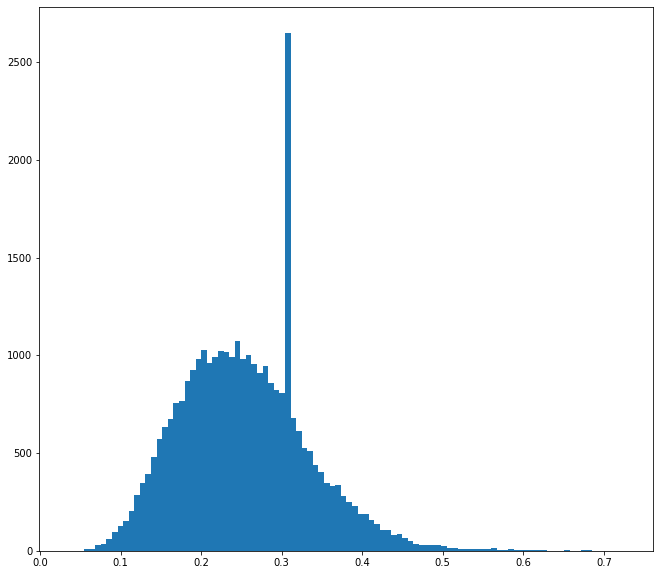

In [72]:
plt.figure(figsize=(11,10))
plt.hist(pred_best.TARGET, bins=100);

In [73]:
pred1.TARGET.value_counts()

0.314217    1968
0.308016      10
0.314192       8
0.305190       5
0.297404       3
            ... 
0.232837       1
0.192071       1
0.281137       1
0.215099       1
0.415850       1
Name: TARGET, Length: 29709, dtype: int64

In [75]:
(pred_best.TARGET == 0.3142174419881098).sum()

1968

In [76]:
idx_an =  np.where(pred1.TARGET == 0.3142174419881098)

In [78]:
pred_best

,CLIENT_ID,TARGET
0,1504364,0.226828
1,1592092,0.169114
2,1582159,0.355655
3,1431753,0.236502
4,1571196,0.284845
...,...,...
31853,1518155,0.167137
31854,1544546,0.160089
31855,1584674,0.273075
31856,1733854,0.168853


In [79]:
pred_best.TARGET.loc[idx_an] = 1

C:\Users\pqlet\AppData\Local\Temp\ipykernel_10392\1730750611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_best.TARGET.loc[idx_an] = 1


In [80]:
pred_best.TARGET.loc[idx_an] 

27       1.0
31       1.0
40       1.0
50       1.0
51       1.0
        ... 
31686    1.0
31709    1.0
31734    1.0
31741    1.0
31757    1.0
Name: TARGET, Length: 1968, dtype: float64

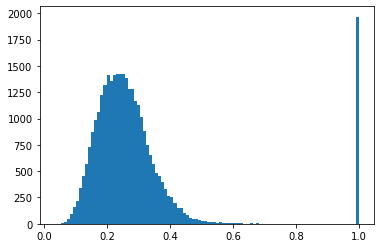

In [83]:
plt.hist(pred_best.TARGET, bins=100);

In [90]:
(pred1.TARGET + pred2.TARGET + pred3.TARGET)/3

0        0.246640
1        0.165562
2        0.396112
3        0.249205
4        0.329674
           ...   
31853    0.171020
31854    0.151818
31855    0.274134
31856    0.197505
31857    0.354074
Name: TARGET, Length: 31858, dtype: float64

In [94]:
pred_out = pred1
pred_out.TARGET = (pred1.TARGET + pred2.TARGET + pred3.TARGET)/3

In [96]:
pred_out.to_csv(f"submissions/subm__meanNEW.csv",index=False)